# Loading the data

In [1]:
import zipfile
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
zp= zipfile.ZipFile('pizza_steak.zip')
zp.extractall()
zp.close()

--2022-07-13 23:32:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.192.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   212MB/s    in 0.5s    

2022-07-13 23:32:27 (212 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Understanding the data.

In [2]:
import os
for dirpath, dirname, filename in os.walk('pizza_steak'):
  print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [3]:
# Get the class names. by doing this if there is number of class it helpful to get them all.
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classes)

['pizza' 'steak']


#  The next step is to visualize the data

In [4]:
# Defining the function to view the random images.
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
from google.colab.patches import cv2_imshow
def random_img(target_dir,target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  image= cv.imread(target_folder + '/' + random_image[0])
  image=cv.resize(image,(224,224))
  cv2_imshow(image)
  cv.waitKey(0)
  # image = mpimg.imread(target_folder + '/' + random_image[0])
  # plt.imshow(image)
  # plt.axis('off')
  # plt.title(target_class)

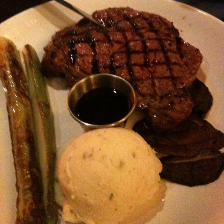

In [5]:
# viwing the random images
random_img(target_dir= 'pizza_steak/train/',
           target_class= 'steak') 

# Preprocessing the data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalizing images b/w 0 and 1 and data augmentation
#  Data augmentation can be simply done by ImageDataGenerator.

train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range= 0.2,
                                             shear_range=0.2,
                                            #  zoom_range= 0.2,
                                            #  width_shift_range= 0.2,
                                            #  height_shift_range= 0.3,
                                             horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale= 1/255.)
'''augmentation should only be done in training data bcz if test data also be augmented then model may not be able to learn.'''


'augmentation should only be done in training data bcz if test data also be augmented then model may not be able to learn.'

In [16]:
# making working directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# importing data from directories and turning it into batchsize
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             batch_size= 32,
                                                             target_size=(224,224),
                                                             class_mode= 'binary',
                                                             shuffle= True)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               class_mode= 'binary',
                                               target_size=(224,224),
                                              )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# create a model:

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Sequential

model_7= Sequential([
         Conv2D(64, 3, activation= 'relu', input_shape=(224,224,3)),
         Conv2D(64, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(32, 3, activation= 'relu'),
         Conv2D(32, 3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(32, 3, activation= 'relu'),
         Conv2D(32,3, activation= 'relu'),
         MaxPool2D(),
         Conv2D(10, 3, activation= 'relu'),
         Conv2D(10,3, activation= 'relu'),
         MaxPool2D(),
         Flatten(),
         Dense(1, activation= 'sigmoid')
])
# compiling the model

model_7.compile(optimizer= Adam(0.001),
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

#  Fitting the model

In [18]:
hisotry_7= model_7.fit(train_data_aug,
                       epochs=10,
                       steps_per_epoch= len(train_data_aug),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 506ms/step - loss: 0.6248 - accuracy: 0.6513 - val_loss: 0.5029 - val_accuracy: 0.7820
Epoch 2/10
47/47 [==============================] - 24s 517ms/step - loss: 0.5084 - accuracy: 0.7753 - val_loss: 0.4466 - val_accuracy: 0.8060
Epoch 3/10
47/47 [==============================] - 23s 500ms/step - loss: 0.4717 - accuracy: 0.7773 - val_loss: 0.3971 - val_accuracy: 0.8260
Epoch 4/10
47/47 [==============================] - 23s 496ms/step - loss: 0.4359 - accuracy: 0.8093 - val_loss: 0.3621 - val_accuracy: 0.8500
Epoch 5/10
47/47 [==============================] - 24s 517ms/step - loss: 0.4186 - accuracy: 0.8187 - val_loss: 0.4411 - val_accuracy: 0.8000
Epoch 6/10
47/47 [==============================] - 23s 495ms/step - loss: 0.4084 - accuracy: 0.8233 - val_loss: 0.3344 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 24s 500ms/step - loss: 0.3903 - accuracy: 0.8353 - val_loss: 0.3961 - val_accuracy: 0.8460

# Evaluating the model

In [19]:
# Defining a function to evaluate the model.
def plot_curves(history):
  # returns curves of loss and accuracy
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy= history.history['val_accuracy']

  epochs= range(len(history.history['loss']))


  plt.plot(epochs, loss, label= 'training_loss')
  plt.plot(epochs, val_loss, label= 'validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('epochs vs loss')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label= 'accuracy')
  plt.plot(epochs, val_accuracy, label= 'val_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.title('epochs vs accuracy')
  plt.legend()


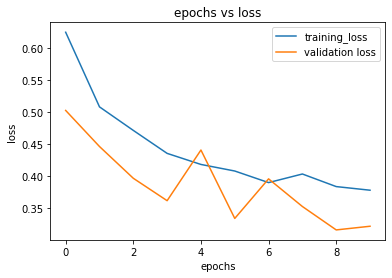

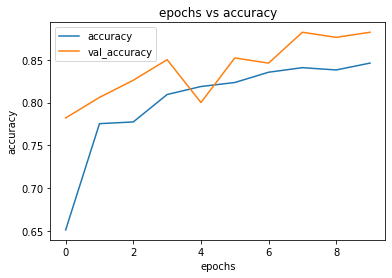

In [20]:
#  Plotting the curves

plot_curves(hisotry_7)

# Custom image Prediction

In [27]:
# Creating a function to load the custom image and preprocess.
def prep_load_im(filename, image_shape=224):
  ''' reads image from file name and turns it into a tensor and reshape and rescale it into required.'''
  ima = tf.io.read_file(filename)
  # to decode the read file into tensor
  ima = tf.image.decode_image(ima)
  # to resize the image
  ima = tf.image.resize(ima,size=[image_shape, image_shape])
  ima = ima/255.
  return ima

In [28]:
# Defining a function for predicting image and plot it.
def pred_plot(model, filename, class_names= classes):
  img= prep_load_im(filename)
  pred_= model.predict(tf.expand_dims(img, axis=0))
  pred_class= class_names[int(tf.round(pred_))]
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis('off')

--2022-07-13 23:48:34--  https://cdn.tasteatlas.com/images/dishes/956dd1838db04f23a43590f8fa078721.jpg
Resolving cdn.tasteatlas.com (cdn.tasteatlas.com)... 104.18.186.91, 104.18.187.91, 2606:4700::6812:ba5b, ...
Connecting to cdn.tasteatlas.com (cdn.tasteatlas.com)|104.18.186.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘956dd1838db04f23a43590f8fa078721.jpg’

956dd1838db04f23a43     [  <=>               ]   1.48M  3.88MB/s    in 0.4s    

2022-07-13 23:48:35 (3.88 MB/s) - ‘956dd1838db04f23a43590f8fa078721.jpg’ saved [1551586]



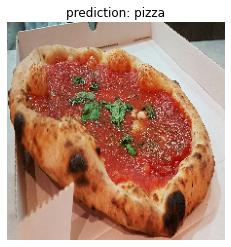

In [30]:
!wget https://cdn.tasteatlas.com/images/dishes/956dd1838db04f23a43590f8fa078721.jpg
pred_plot(model_7, filename= '956dd1838db04f23a43590f8fa078721.jpg')